# Práctica 5: primer modelo de clasificación n-dimensional

Hay muchas técnicas diferentes para encontrar las características más relevantes, ¿cómo saber cuál usar?. Un enfoque sólido consiste en evaluar los modelos utilizando diferentes métodos, y seleccionar el método que resulte en un modelo con el mejor rendimiento. 

En esta sección, evaluaremos un modelo de Regresión Logística con todas las características en comparación con un modelo construido a partir de características seleccionadas por chi-cuadrado y aquellas características seleccionadas a través de información mutua. La regresión logística es un buen modelo para probar los métodos de selección de características, ya que puede tener un mejor rendimiento si se eliminan del modelo las características irrelevantes.

### Buscando el modelo de clasificación con todas las características

Como primer paso, evaluaremos un modelo de `LogisticRegression` utilizando todas las características disponibles. El modelo se genera dado el conjunto de datos de entrenamiento (train) y se evalúa con el conjunto de datos de prueba (test).

Nota: los resultados pueden variar dada la naturaleza estocástica del algoritmo de aprendizaje. Intenta ejecutar el ejemplo varias veces.

### Imports

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Nota:** antes de implementar los siguientes métodos, debemos asegurarnos de que el `DataFrame` sólo contiene características categóricas.

In [2]:
file = "../heart.csv"
df = pd.read_csv(file)
df.columns
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
for i in names:
    if(len(df[i].unique()) == 2):
        x =(df[i].unique())
        df[i].replace({
            x[0] : "a",
            x[1] : "b"
        }, inplace=True)
    elif(len(df[i].unique()) == 3):
        x =(df[i].unique())
        df[i].replace({
            x[0] : "a",
            x[1] : "b",
            x[2] : "c"
        }, inplace=True)
    elif(len(df[i].unique()) == 4):
        x =(df[i].unique())
        df[i].replace({
            x[0] : "a",
            x[1] : "b",
            x[2] : "c",
            x[3] : "d"
        }, inplace=True)
    elif(len(df[i].unique()) == 5):
        x =(df[i].unique())
        df[i].replace({
            x[0] : "a",
            x[1] : "b",
            x[2] : "c", 
            x[3] : "d", 
            x[4] : "e"
        }, inplace=True)
    else:
        bins=np.linspace(min(df[i]),max(df[i]),5)
        names=["a","b","c", "d"]
        df[i]=pd.cut(df[i],bins,labels=names)
df = df.dropna()
df.to_csv("Archivo.csv", header = True, index = False)

In [3]:
#Cargamos el dataset
def load_dataset(filename):
    #Como un Dataframe
    data = read_csv(filename, header=None)
    #Creamos una matriz con los datos
    dataset = data.values
    #Dividimos en X y y
    X = dataset[:, :-1]
    y = dataset[:,-1]
    #Forzamos el tipo string
    X = X.astype(str)
    return X, y
 
#Preparamos los datos de entrada, X
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    oe.fit(X_test)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
#Preparamos los datos de salida, y
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    le.fit(y_test)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [4]:
#Cargamos el dataset
file = "Archivo.csv"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos ay
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_enc)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy/exactitud: 74.63 %


### Buscando el modelo de clasificación con selección de características vía Chi-cuadrada

In [5]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 2.165528
Característica 1: 15.040459
Característica 2: 25.838231
Característica 3: 12.263018
Característica 4: 10.269817
Característica 5: 1.631751
Característica 6: 13.994354
Característica 7: 10.823156
Característica 8: 19.213083
Característica 9: 29.545917
Característica 10: 2.919848
Característica 11: 49.437112
Característica 12: 6.514013
Accuracy/exactitud: 76.12 %


C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


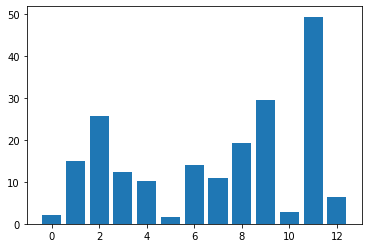

In [6]:
#Cargamos el dataset
file = "Archivo.csv"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

### Buscando el modelo de clasificación con selección de características vía Información Mutua

In [7]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 0.143674
Característica 1: 0.097510
Característica 2: 0.078932
Característica 3: 0.110144
Característica 4: 0.038610
Característica 5: 0.000000
Característica 6: 0.000000
Característica 7: 0.069024
Característica 8: 0.063769
Característica 9: 0.000000
Característica 10: 0.044465
Característica 11: 0.207005
Característica 12: 0.173312
Accuracy/exactitud: 61.19 %


C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


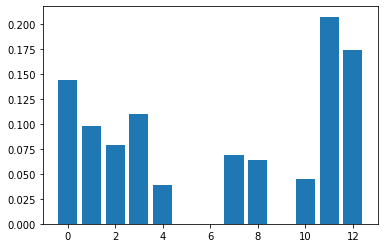

In [8]:
#Cargamos el dataset
file = "Archivo.csv"
X, y = load_dataset(file)

#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')